In [ ]:
from google.colab import drive
drive.flush_and_unmount()

drive.mount('/content/gdrive')

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/gdrive


In [ ]:
!pip install sk-video

     |████████████████████████████████| 2.3MB 3.8MB/s 


In [ ]:
import os
import skvideo.io
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
os.chdir("/content/gdrive/MyDrive")

In [ ]:
folder_path = "/content/videoToFrameAtIntervals"

if not os.path.exists(folder_path):
      os.mkdir(folder_path)

os.chdir(folder_path)

In [ ]:
output_path = "/content/gdrive/MyDrive/outputvideo/"

if not os.path.exists(folder_path):
      os.mkdir(folder_path)

os.chdir(folder_path)

output_file=output_path+'video.avi'

In [ ]:
file_name="PRG1"
video_path="/content/gdrive/MyDrive/"+file_name+".avi"


In [ ]:
def frame_count(video_path, manual=False):
    def manual_count(handler):
        frames = 0
        while True:
            status, frame = handler.read()
            if not status:
                break
            frames += 1
        return frames 

    cap = cv2.VideoCapture(video_path)
    # Slow, inefficient but 100% accurate method 
    if manual:
        frames = manual_count(cap)
    # Fast, efficient but slightly inaccurate method
    else:
        try:
            frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        except:
            frames = manual_count(cap)
    cap.release()
    return frames

In [ ]:
frames=frame_count(video_path)
print(frames)

10821


In [ ]:
def saveFramesAtIntervals(stepsize, folder_path):
  count = 0
  cap = cv2.VideoCapture(video_path)

  if not os.path.exists(folder_path):
      os.makedirs(folder_path)

  while (cap.isOpened()):
      count= count+1

      ret, frame = cap.read()

      if ret ==False:
            break
      
      if count%stepsize ==0: 
          # Capture frame-by-frame
          frame = cv2.resize(frame, (224, 224), fx = 0, fy = 0, interpolation = cv2.INTER_CUBIC)
          cv2.imwrite(folder_path+"/"+str(count)+".png", frame)
    
  # release the video capture object
  cap.release()
  # Closes all the windows currently opened.
  cv2.destroyAllWindows()

In [ ]:

temp_path='/content/frames'

In [ ]:
saveFramesAtIntervals(1,folder_path)

In [ ]:
def get_difference_frame(frame1,frame2):
  difference_frame = cv2.absdiff(frame1, frame2)
  ret, thres = cv2.threshold(difference_frame, 69, 255, cv2.THRESH_BINARY)
  return thres


In [ ]:
frames=frame_count(video_path)
diff_frames=[]
for i in range(2,frames+1):
  if ((i-2)%1200==0):
    diff_frame=np.full((224,224),255)
    
  else:
    frame1= cv2.imread(folder_path+"/"+f'{i-1}'+".png")
    frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    frame2= cv2.imread(folder_path+"/"+f'{i}'+".png")
    frame2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    diff_frame=get_difference_frame(frame1,frame2)
  if (i%1000==0):
    frames_remaining=frames-i+1
    print("frames remaining  ====> ",frames_remaining)
    #cv2_imshow(diff_frame)
  
  
  
  diff_frames.append(diff_frame)
  

frames remaining  ====>  9822
frames remaining  ====>  8822
frames remaining  ====>  7822
frames remaining  ====>  6822
frames remaining  ====>  5822
frames remaining  ====>  4822
frames remaining  ====>  3822
frames remaining  ====>  2822
frames remaining  ====>  1822
frames remaining  ====>  822


In [ ]:
import skvideo.io

diff_frames=np.array(diff_frames)
skvideo.io.vwrite('/content/gdrive/MyDrive/black-white-video-1min.avi',diff_frames,inputdict={'-r':'20'},outputdict={'-r':'20'})



In [ ]:
motion_frames=[]
motion_frame=np.zeros((224,224,3))
for f in range(len(diff_frames)):
    real_frame=cv2.imread(folder_path+"/"+f'{f+1}'+".png")
    difference_frame=diff_frames[f]
    threshold_indices = difference_frame < 100
    real_frame[threshold_indices]=0
    motion_frames.append(real_frame)


  

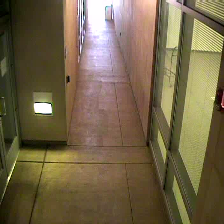

0


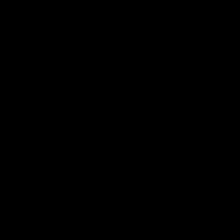

1


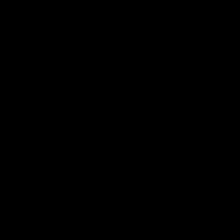

2


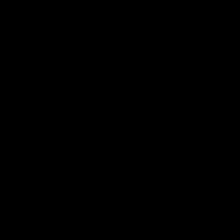

3


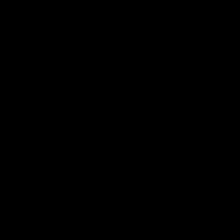

8


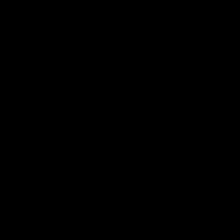

9


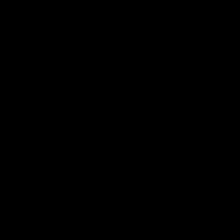

10


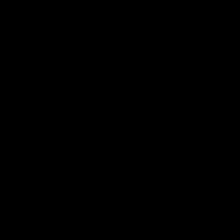

11


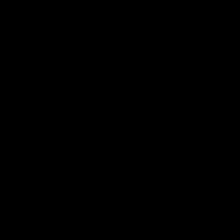

20


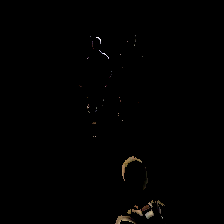

1973


In [ ]:
for i in(0,1,2,3,8,9,10,11,20,1973):
  cv2_imshow(motion_frames[i])
  print(i)

In [ ]:
#motion_frames=np.array(motion_frames)
skvideo.io.vwrite('/content/colored-video-1min.avi',motion_frames,inputdict={'-r':'20'},outputdict={'-r':'20'})